# Graph Theory: Simple and Shortest Paths

## Introduction

In this lesson, you'll start to investigate transversing paths through networks! This has many useful applications such as finding the shortest path from one node to another. Path finding algorithms are central to all directions applications such as Google Maps, Waze, or Apple Maps. Additionally, the shortest path between two nodes also serves as an incredibly important distance metric between two nodes! This will then serve as a foundation for future discussions regarding node centrality, underlying analysis such as cliques in social circles, or bottleknecks in the diffussion of information.

## Objectives
You will be able to:
* Understand and explain simple paths and shortest paths
* Calculate simple and shortest paths for undirected, directed and weighted graphs
* Explain Dijkstra Algorithm and calculate the shortest path using this algorithm in networkx
* Customize network visualizations

## Importing Packages

In [1]:
import networkx as nx
import numpy as np
%matplotlib inline

## Creating a [Small World] Network

To start talking about paths and distances between nodes, it helps to have a network to discuss. Here's a quick generated network. This particular network will be a small world network, which you'll learn more about in some upcoming lessons.

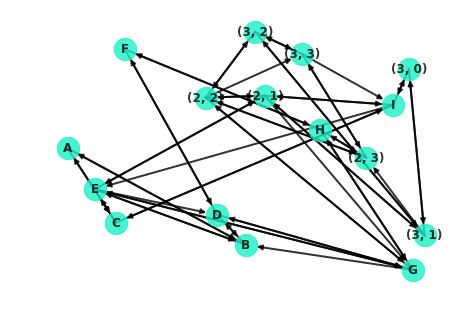

In [3]:
G = nx.navigable_small_world_graph(4, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ["A", "B", "C", "D", "E", "F", "G", "H", "I"])))
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8)

## Retrieving Shortest Paths with NetworkX

NetworkX contains easy methods for finding the shortest paths between nodes. Most require you to pass in the network, starting point, and ending node.

You can check if there is a path between two nodes:

In [3]:
nx.has_path(G, "F", "G")

True

You can find the shortest path which returns a list of nodes roadmapping how to hop from the starting node to the destination node:

In [4]:
nx.shortest_path(G, "F", "G")

['F', 'I', 'G']

Or you can directly access the lenght of the shortest path:

In [5]:
nx.shortest_path_length(G, "F", "G")

2

The algorithm underlying these methods is known as Dijkstra's algorithm. You'll take a look at how the algorithm itself works more in a moment. In the meantime, it's worth noting that the last two methods are also accessible under another method name paying homage to their creator:

> Note: going forward, we will exclusively use the `nx.dijkstra...()` methods in lieu of the `nx.shortest_path...()` counterparts.

In [6]:
nx.dijkstra_path(G, "F", "G")

['F', 'I', 'G']

In [7]:
nx.dijkstra_path_length(G, "F", "G")

2

## Visualizing a Path

Now that you've seen how to quickly seen how to use NetworkX to retrieve the shortest paths between nodes, let's take a look at how you can visualize said paths. For example, the shortest path between `F` and `G` looks like this:
<img name="final_path_viz" src="images/path.png">

## Accessing Edges

In [40]:
G.edges

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'D'), ('B', 'E'), ('B', 'C'), ('C', 'A'), ('C', 'E'), ('C', 'G'), ('C', 'F'), ('D', 'B'), ('D', 'F'), ('D', 'D'), ('E', 'B'), ('E', 'C'), ('E', 'F'), ('E', 'H'), ('F', 'D'), ('F', 'E'), ('F', 'I'), ('G', 'C'), ('G', 'H'), ('G', 'B'), ('H', 'E'), ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'H'), ('I', 'G')])

## Retrieving a specific Edge

You can retrieve a specific edge similar to retrieving an item from a dictionary:

In [41]:
G.edges[('F', 'E')]

{}

While the entry is uninformative (there are no weights and no properties set), the mere existence of a response (and not hitting a key error) indicates that the edge exists. For example, the following returns an error as there is no out edge from F to A:

In [44]:
G.edges[('F', 'A')]

KeyError: 'A'

## Retrieving Outbound Connections for a Given Node

In [10]:
G['F']

AtlasView({'D': {}, 'E': {}, 'I': {}})

> **Warning:** Some of the edges in the network graph are difficult to see as they overlap or can be running through other nodes. For example, note from the display below how node C is actually connected to nodes A and G! These edges are virtually impossible to notice with the current drawing of the graph.

In [11]:
G['C']

AtlasView({'A': {}, 'E': {}, 'G': {}, 'F': {}})

## Coloring Edges

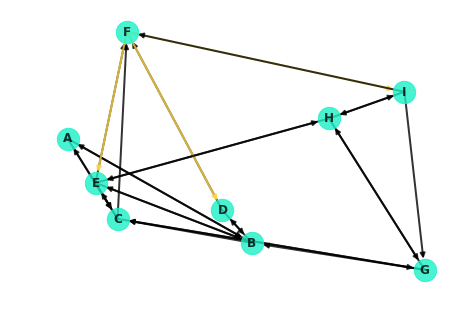

In [48]:
colors = []
for edge in G.edges:
#     print(type(edge), edge) #To learn more about what's happening, uncomment this line (warning: verbose printout!)
    if edge[0] == "F":
        colors.append("#ffd43d")
    else:
        colors.append("black")
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8, edge_color=colors)

Hmmm, well this isn't ideal. Note that the node from F to I is extremely hard to see! It's covered up by the edge from I to F. As a hacky little workaround, you can redraw the specific edges in question.

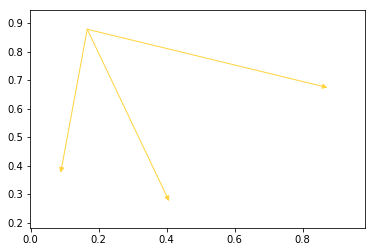

In [49]:
nx.draw_networkx_edges(G, nx.random_layout(G, seed=9), [e for e in G.edges() if e[0]=="F"], edge_color="#ffd43d")

Overlaying these on the entire graph:

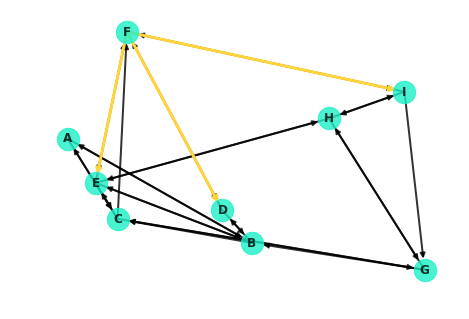

In [106]:
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8, edge_color="black")
nx.draw_networkx_edges(G, edgelist=[e for e in G.edges() if e[0]=="F"], pos=nx.random_layout(G, seed=9),
                       width=3, edge_color="#ffd43d");

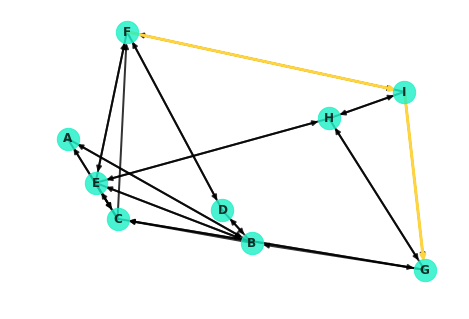

In [107]:
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8)
nx.draw_networkx_edges(G, nx.random_layout(G, seed=9), width=3,
                       edgelist=[("F", "I"), ("I","G")], edge_color="#ffd43d");

## Under the Hood: Dijkstra's Algorithm

Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudocode outline for the algorithm:

1. Mark all nodes as unvisited
2. Set the distance of the starting node as 0, and $\infty$ for all other nodes
3. Set the starting node as the current node
4. Visit each of the neighbors of the current node
    1. For each neighbor, calculate the distance to that node traveling through the current node
    2. If this distance is less then the current distance recorded for that node, update the record accordingly
5. Mark the current node as "visited"
6. Of the unvisited nodes, set the one with the smallest distance to the current node
7. Repeat steps 4 through 6 until one of the following:
    1. The algorithm terminates when the destination node is the current node
    2. Alternatively, if the the smallest distance of the unvisited nodes is $\infty$, then no path exists to the destination node. 

> Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned.

In the upcoming lab, you'll work to code this classic algorithm on your own! And if you're really up for the challenge, you can use your visualization knowledge to create a fun visualization of the algorithm like this:

## Additional Resources

[NetworkX Drawing Parameters](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)

## Summary 

In this lesson, you started exploring fundamental concepts regarding paths in networks. This included practical examples using NetworkX's built in methods, and navigating the built in graph, node and edge objects within the package. Finally, you also started to preview the underlying theory to shortest paths, by looking at the classic Dijkstra's algorithm.